# Exercises

## Imports & Data

In [23]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import psutil
from pathlib import Path
import os
import scipy as sp

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux

import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)

np.random.seed(1337)

In [2]:
# download data for the lesson (this can take a few minutes)
download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. 

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

In [8]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'

FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)
ROI = cm.load(input_tif_file_path)

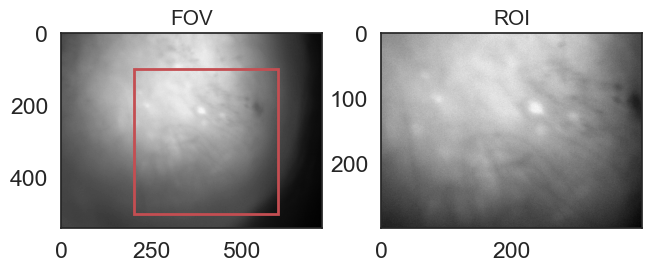

In [7]:
# Let's visualize the FOV and the ROI
aux.plot_FOV(FOV_file = input_tif_file_path_FOV , ROI_file = input_tif_file_path)

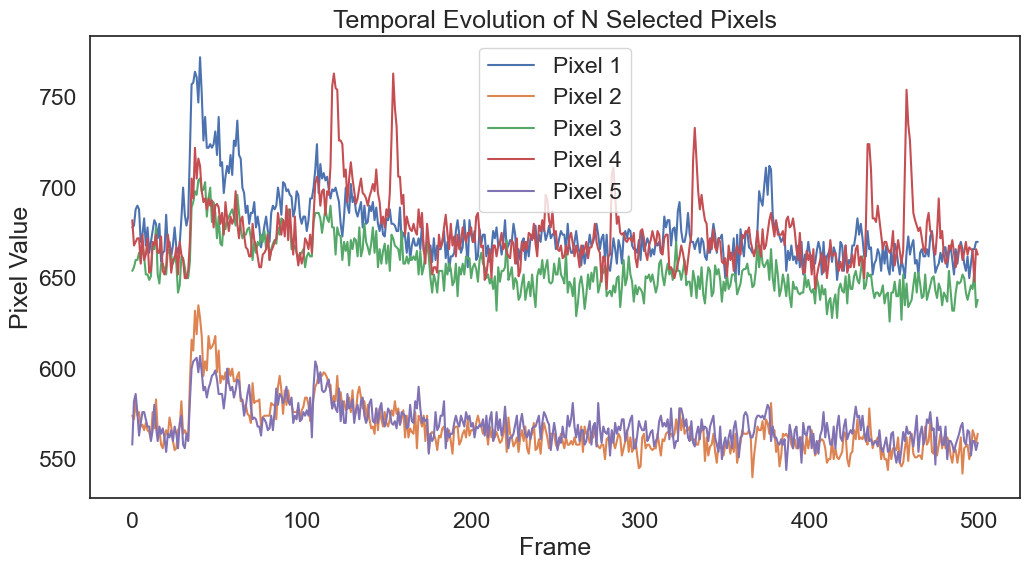

In [80]:
# A. Distinguishing Pixels

# Set Parameters
N = 5
num_frames = 500
height = 300
width = 500
pixel_coords = np.random.randint(0, min(height, width), size=(N, 2))
np.random.seed(4)

# Extract pixel values
pixel_values = np.zeros((N, num_frames))
for i, coord in enumerate(pixel_coords):
    pixel_values[i] = ROIarray[:, coord[0], coord[1]]

# Plot temporal evolution
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(np.arange(num_frames), pixel_values[i], label=f"Pixel {i + 1}")

plt.xlabel("Frame")
plt.ylabel("Pixel Value")
plt.title("Temporal Evolution of N Selected Pixels")
plt.legend()
plt.show()

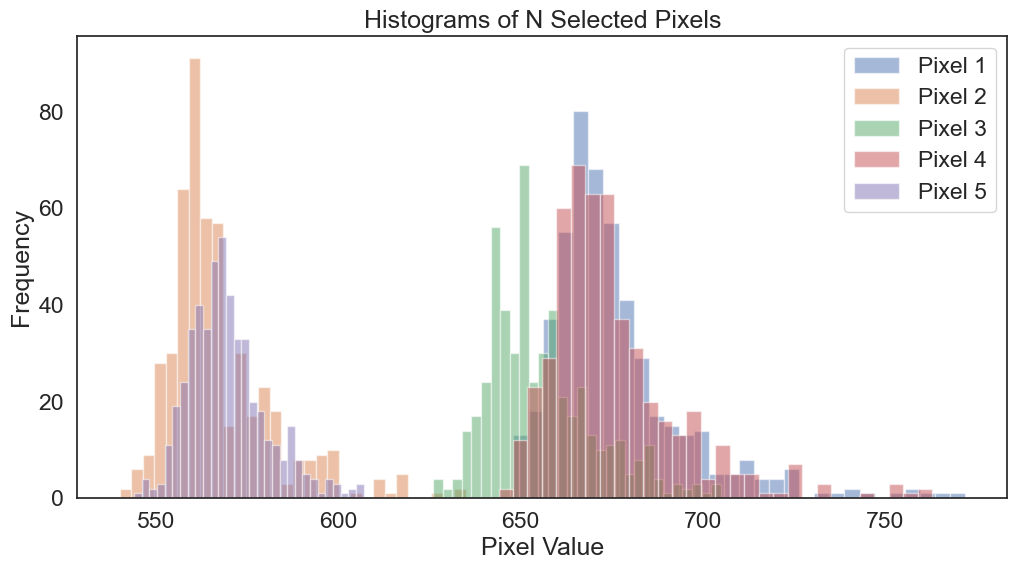

In [81]:
# B. Temporal Statistics

# Plot histograms
num_bins = 30
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.hist(pixel_values[i], bins=num_bins, alpha=0.5, label=f"Pixel {i + 1}")

plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histograms of N Selected Pixels")
plt.legend()
plt.show()

We see two very distinct regions, centered on pixel values ~560 and ~660. The pixel values for active neurons should be generally higher than for background processes. We can also see more overlap in the values and frequencies of two active pixels in the higher region. This suggests they behave more coherently. Whereas background will be more random. We can therefore differentiate active neurons from background processes by looking at the pixel values and similarity in the histogram distributions. 

We need to do a segmentation of the neurons, and not work directly with the temporal traces, because generally multiple pixels are part of the same neuron. Thus it is not true that pixels are independent signals and we should then not treat them as such. By combining the values of multiple pixels to describe the behaviour of a neuron we get a more accurate description than vice versa.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.